# Name: Ahmed Adil
# Roll Number: 25280033

# Assignment 1 (AI-600)

Link: https://github.com/adilawan1/deep-learning-assignment-1

# Question 1 (Part A)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_csv('/content/train.csv')
print("Original data loaded into df_raw. First 5 rows:")
print(df_raw.head())
print(df_raw.info())

Original data loaded into df_raw. First 5 rows:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  price_class  
0               15.0             254.0            3  
1                1.0               0.0            1  
2               70.0              90.0            1  
3                1.0               NaN            1  
4                0.0              89.0            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -----

**Samples**: 41,348 rows

**Features**: 7 columns

**Data types:**

**2 categorical (object):** neighbourhood_group, room_type

**4 numerical (float64):** minimum_nights, amenity_score, number_of_reviews, availability_365

**1 integer (int64):** price_class

Some columns have missing values **(non-null counts < 41,348)**.

In [3]:
X = df_raw.drop('price_class', axis=1)
Y = df_raw['price_class']

print("Features (X) head:")
print(X.head())
print("\nTarget (Y) head:")
print(Y.head())

Features (X) head:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  
0               15.0             254.0  
1                1.0               0.0  
2               70.0              90.0  
3                1.0               NaN  
4                0.0              89.0  

Target (Y) head:
0    3
1    1
2    1
3    1
4    1
Name: price_class, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)

print("\nPrice class distribution in original data:\n", Y.value_counts(normalize=True))
print("\nPrice class distribution in Y_train:\n", Y_train.value_counts(normalize=True))
print("\nPrice class distribution in Y_val:\n", Y_val.value_counts(normalize=True))

Shape of X_train: (33078, 6)
Shape of X_val: (8270, 6)
Shape of Y_train: (33078,)
Shape of Y_val: (8270,)

Price class distribution in original data:
 price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64

Price class distribution in Y_train:
 price_class
1    0.563184
2    0.238074
0    0.134651
3    0.064091
Name: proportion, dtype: float64

Price class distribution in Y_val:
 price_class
1    0.563241
2    0.238089
0    0.134583
3    0.064087
Name: proportion, dtype: float64


In [5]:
numerical_cols_with_missing = X_train.select_dtypes(include=np.number).columns[X_train.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_missing = X_train.select_dtypes(include='object').columns[X_train.select_dtypes(include='object').isnull().any()].tolist()

print("Numerical columns with missing values in X_train:", numerical_cols_with_missing)
print("Categorical columns with missing values in X_train:", categorical_cols_with_missing)

Numerical columns with missing values in X_train: ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
Categorical columns with missing values in X_train: ['neighbourhood_group', 'room_type']


In [6]:
imputation_values = {}

# Impute numerical columns with median from X_train
for col in numerical_cols_with_missing:
    median_val = X_train[col].median()
    imputation_values[col] = median_val
    X_train[col] = X_train[col].fillna(median_val)
    X_val[col] = X_val[col].fillna(median_val)
    print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with mode from X_train
for col in categorical_cols_with_missing:
    mode_val = X_train[col].mode()[0]
    imputation_values[col] = mode_val
    X_train[col] = X_train[col].fillna(mode_val)
    X_val[col] = X_val[col].fillna(mode_val)
    print(f"Imputed categorical column '{col}' with mode: {mode_val}")

print("\nMissing values in X_train after imputation:")
print(X_train[numerical_cols_with_missing + categorical_cols_with_missing].isnull().sum())

print("\nMissing values in X_val after imputation:")
print(X_val[numerical_cols_with_missing + categorical_cols_with_missing].isnull().sum())

Imputed numerical column 'minimum_nights' with median: 3.0
Imputed numerical column 'amenity_score' with median: 51.5
Imputed numerical column 'number_of_reviews' with median: 5.0
Imputed numerical column 'availability_365' with median: 43.0
Imputed categorical column 'neighbourhood_group' with mode: Manhattan
Imputed categorical column 'room_type' with mode: Entire home/apt

Missing values in X_train after imputation:
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
neighbourhood_group    0
room_type              0
dtype: int64

Missing values in X_val after imputation:
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
neighbourhood_group    0
room_type              0
dtype: int64


#Imputation Strategy

Numerical columns uses median for imputation because it handles extreme values well and gives a typical value without being skewed.

Categorical columns uses mode for imputation because it replaces missing labels with the most common category, which is the safest assumption.

neighbourhood_group
Manhattan        0.442001
Brooklyn         0.412057
Queens           0.115925
Bronx            0.022390
Staten Island    0.007628
Name: proportion, dtype: float64


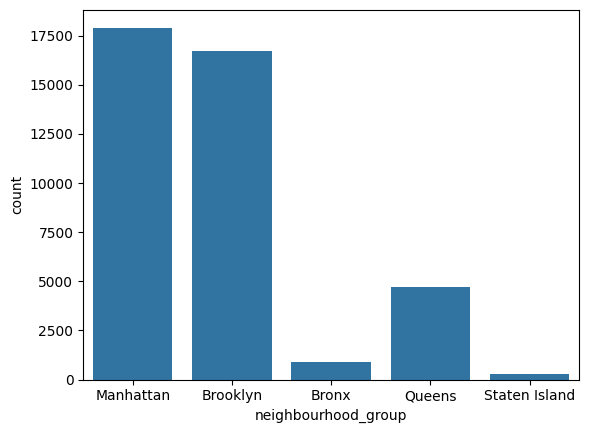

room_type
Entire home/apt    0.517932
Private room       0.458134
Shared room        0.023934
Name: proportion, dtype: float64


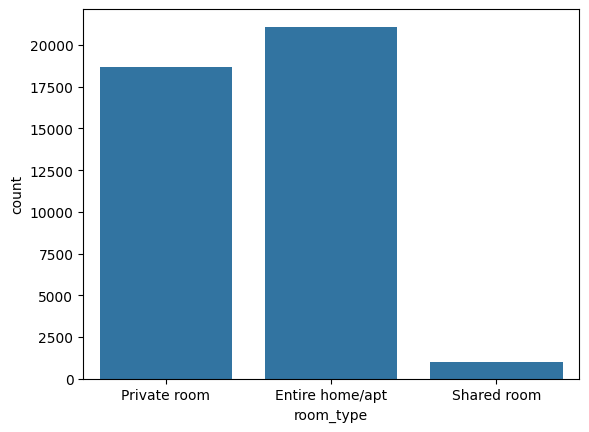

minimum_nights
1.0       0.258632
2.0       0.239494
3.0       0.164468
30.0      0.078424
4.0       0.067656
            ...   
225.0     0.000025
1000.0    0.000025
222.0     0.000025
275.0     0.000025
88.0      0.000025
Name: proportion, Length: 98, dtype: float64


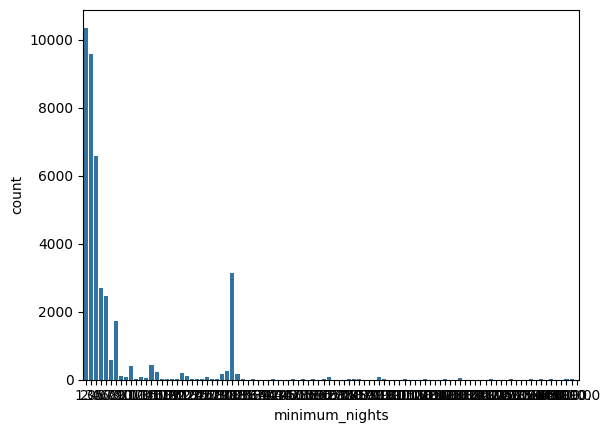

amenity_score
52.0    0.002770
46.8    0.002696
53.6    0.002671
49.9    0.002671
52.7    0.002597
          ...   
99.0    0.000049
97.9    0.000049
97.6    0.000049
95.2    0.000025
98.5    0.000025
Name: proportion, Length: 891, dtype: float64


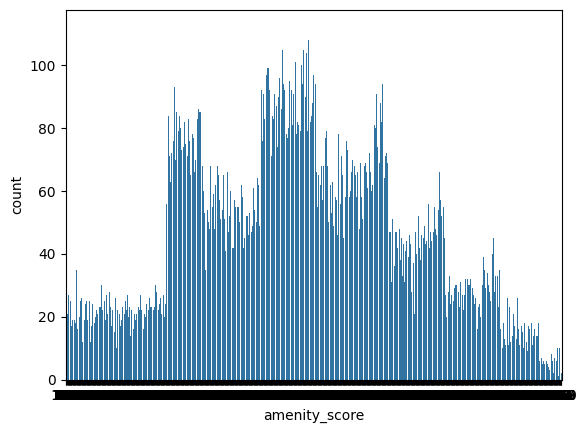

number_of_reviews
0.0      0.197042
1.0      0.103418
2.0      0.072045
3.0      0.052281
4.0      0.041044
           ...   
314.0    0.000025
430.0    0.000025
278.0    0.000025
607.0    0.000025
253.0    0.000025
Name: proportion, Length: 379, dtype: float64


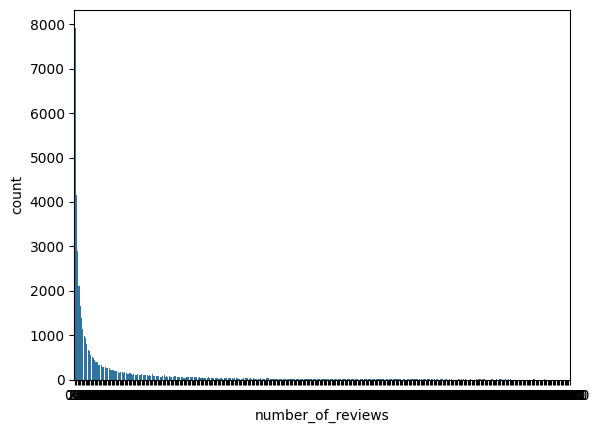

availability_365
0.0      0.361078
365.0    0.025765
364.0    0.009619
1.0      0.008392
89.0     0.007288
           ...   
195.0    0.000515
196.0    0.000491
183.0    0.000466
206.0    0.000442
202.0    0.000368
Name: proportion, Length: 366, dtype: float64


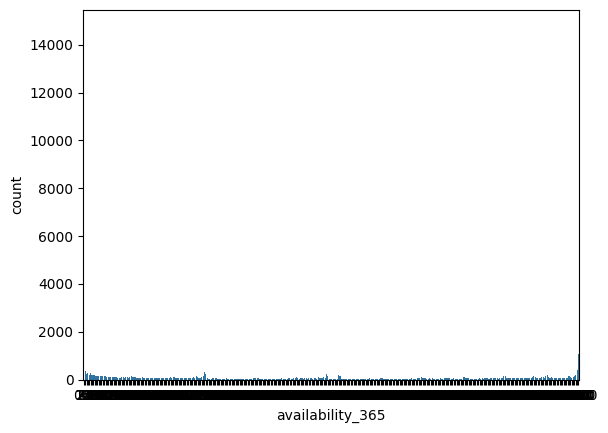

price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64


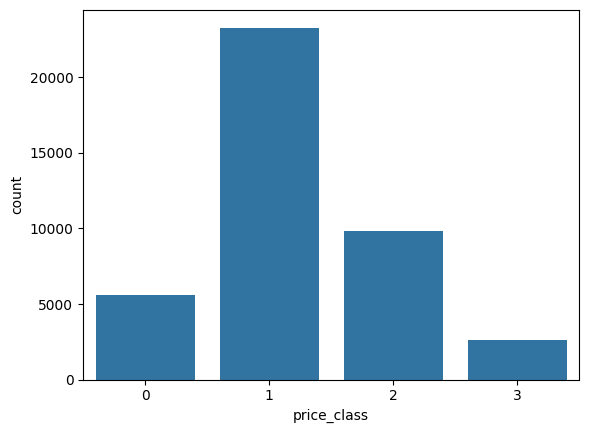

In [7]:
for col in df_raw.columns:
    # Get raw counts
    counts = df_raw[col].value_counts()

    # Get percentage (often more useful)
    percent = df_raw[col].value_counts(normalize=True)
    print(percent)

    # Visualization
    sns.countplot(x=col, data=df_raw)
    plt.show()

**Comment on class imbalance:**

The count vs price_class graph represents imbalance for target variable (i.e. more than half of the data belongs to class 1 (56.31%)), shows that this needs to be addressed as it will have an on the biasness of the model towards the majority class (i.e. class 1)

# Encoding scheme

We are using **one-hot encoding** because both the neighborhood_group and room_type columns have low cardinalities and don't have a natural order or relationships. The label encoding scheme would have been better if there was some natural relationship between these column values (e.g. small, medium, large etc)

In [8]:
X_train = pd.get_dummies(X_train, columns=categorical_cols_with_missing, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols_with_missing, drop_first=True, dtype=int)

train_cols = X_train.columns
val_cols = X_val.columns

missing_in_val = set(train_cols) - set(val_cols)
for c in missing_in_val:
    X_val[c] = 0

missing_in_train = set(val_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_val = X_val[train_cols]

print("First 5 rows of X_train after one-hot encoding:")
print(X_train.head())
print("\nFirst 5 rows of X_val after one-hot encoding:")
print(X_val.head())
print("\nShape of X_train after encoding:", X_train.shape)
print("Shape of X_val after encoding:", X_val.shape)

First 5 rows of X_train after one-hot encoding:
       minimum_nights  amenity_score  number_of_reviews  availability_365  \
35004             5.0           89.2                3.0              12.0   
35818            20.0           51.5                0.0              40.0   
6658              1.0           48.1                1.0              83.0   
31372             1.0           59.3                1.0               0.0   
25775             1.0           10.9                8.0              53.0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
35004                             0                              1   
35818                             1                              0   
6658                              1                              0   
31372                             0                              0   
25775                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island

# Normalization

*   numerical features

Standard Scalar was used since it helps turning the data have a mean at 0 with the same spread across all the features.


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_val
X_train[numerical_cols_with_missing] = scaler.fit_transform(X_train[numerical_cols_with_missing])
X_val[numerical_cols_with_missing] = scaler.transform(X_val[numerical_cols_with_missing])

print("First 5 rows of X_train after standardization:")
print(X_train.head())
print("\nFirst 5 rows of X_val after standardization:")
print(X_val.head())

First 5 rows of X_train after standardization:
       minimum_nights  amenity_score  number_of_reviews  availability_365  \
35004       -0.098055       1.932107          -0.456139         -0.756334   
35818        0.673537      -0.027708          -0.524901         -0.542002   
6658        -0.303813      -0.204455          -0.501980         -0.212848   
31372       -0.303813       0.377771          -0.501980         -0.848191   
25775       -0.303813      -2.138277          -0.341536         -0.442490   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
35004                             0                              1   
35818                             1                              0   
6658                              1                              0   
31372                             0                              0   
25775                             0                              1   

       neighbourhood_group_Queens  neighbourhood_group_Staten Island 

In [10]:
print("Final X_train shape:", X_train.shape)
print("Final X_val shape:", X_val.shape)
print("Final Y_train shape:", Y_train.shape)
print("Final Y_val shape:", Y_val.shape)

Final X_train shape: (33078, 10)
Final X_val shape: (8270, 10)
Final Y_train shape: (33078,)
Final Y_val shape: (8270,)


In [11]:
Y_train_one_hot = pd.get_dummies(Y_train, dtype=int).values.T
Y_val_one_hot = pd.get_dummies(Y_val, dtype=int).values.T

print("Shape of Y_train_one_hot:", Y_train_one_hot.shape)
print("First 5 columns of Y_train_one_hot:\n", Y_train_one_hot[:, :5])
print("\nShape of Y_val_one_hot:", Y_val_one_hot.shape)
print("First 5 columns of Y_val_one_hot:\n", Y_val_one_hot[:, :5])

Shape of Y_train_one_hot: (4, 33078)
First 5 columns of Y_train_one_hot:
 [[0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]

Shape of Y_val_one_hot: (4, 8270)
First 5 columns of Y_val_one_hot:
 [[0 0 1 1 0]
 [0 1 0 0 0]
 [1 0 0 0 1]
 [0 0 0 0 0]]


# Plot and analyze relationships between individual features and the target variable using suitable visualizations.

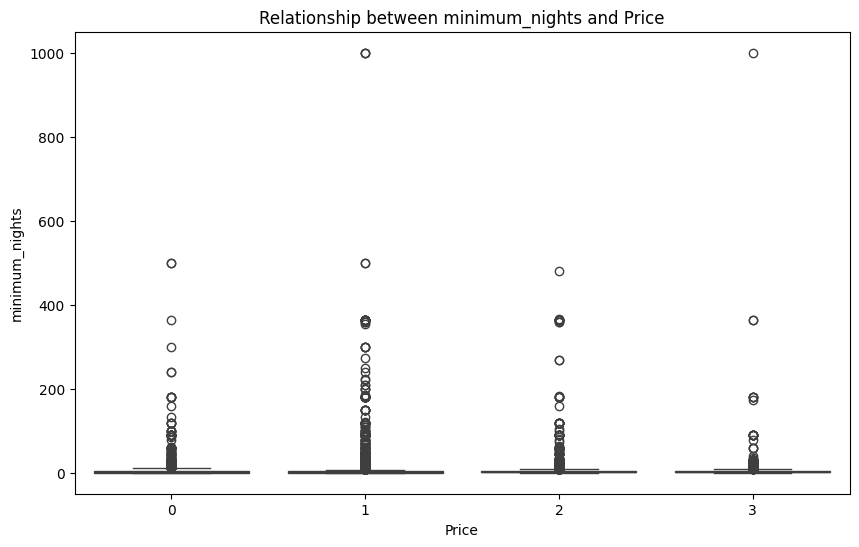

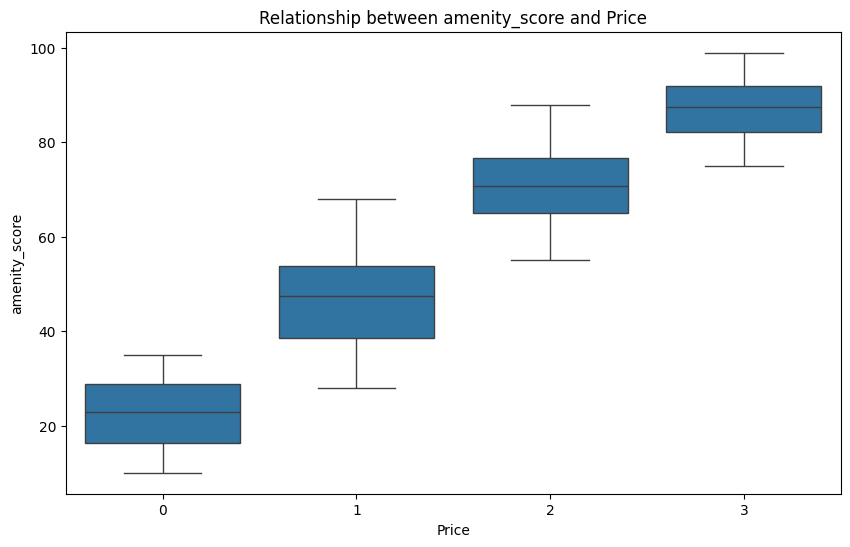

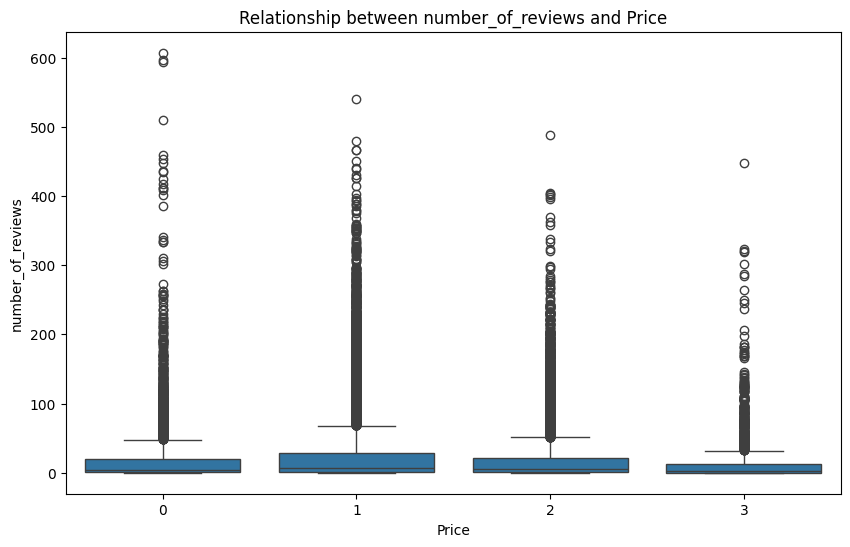

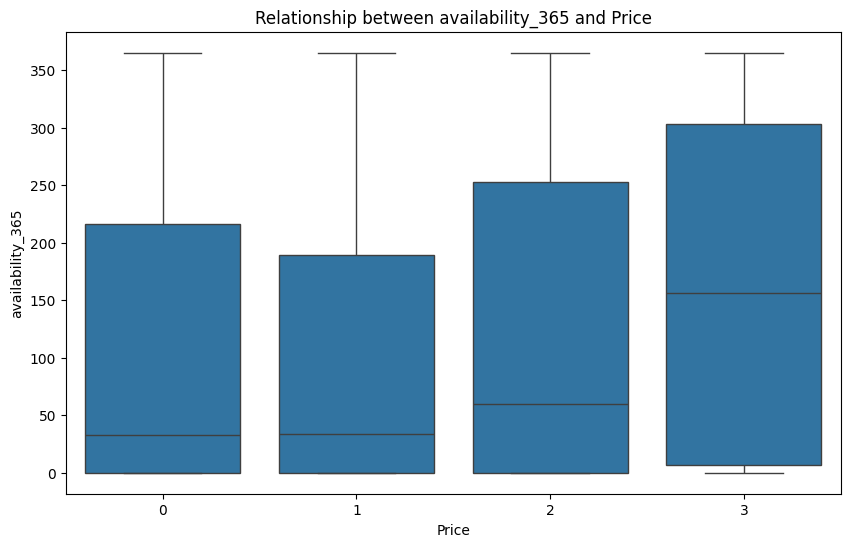

In [12]:
# Using a scatterplot to see the relationship
for col in numerical_cols_with_missing:
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=col, x='price_class', data=df_raw)
  plt.title(f'Relationship between {col} and Price')
  plt.xlabel('Price')
  plt.ylabel(col)
  plt.show()

In [13]:
cols_to_check = [
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room'
]

df_combined = pd.concat([X_train, Y_train.rename('price_class')], axis=1)

full_cols_to_check = cols_to_check + ['price_class']

print(df_combined[full_cols_to_check].corr()['price_class'].sort_values(ascending=False))

price_class                          1.000000
neighbourhood_group_Manhattan        0.319014
neighbourhood_group_Staten Island   -0.044110
room_type_Shared room               -0.145376
neighbourhood_group_Queens          -0.170367
neighbourhood_group_Brooklyn        -0.176503
room_type_Private room              -0.496027
Name: price_class, dtype: float64


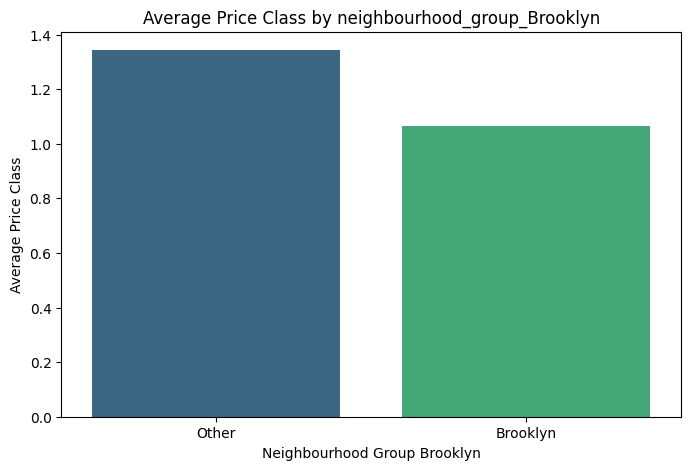

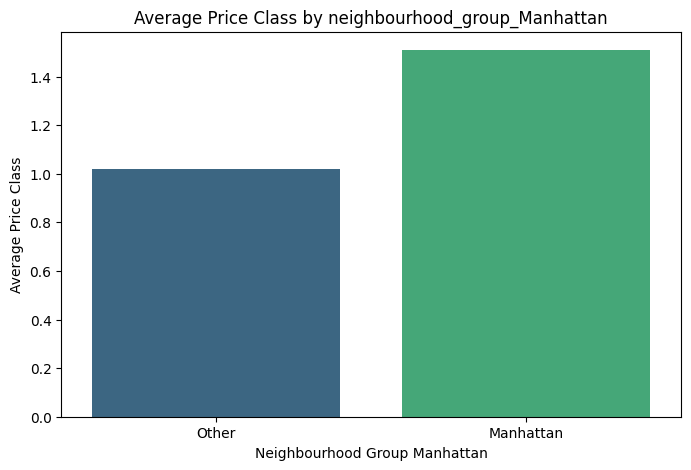

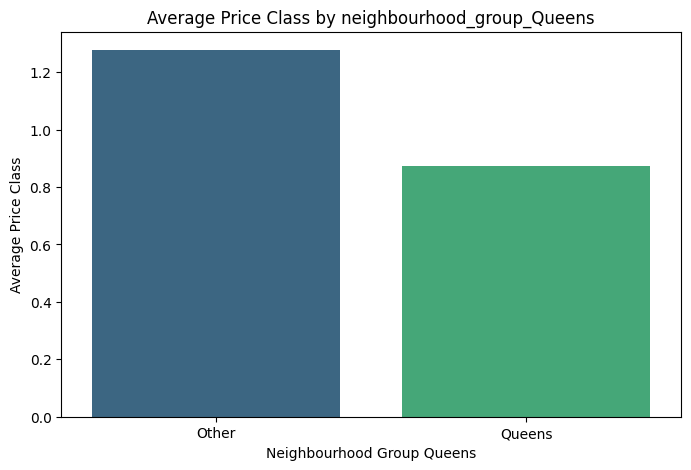

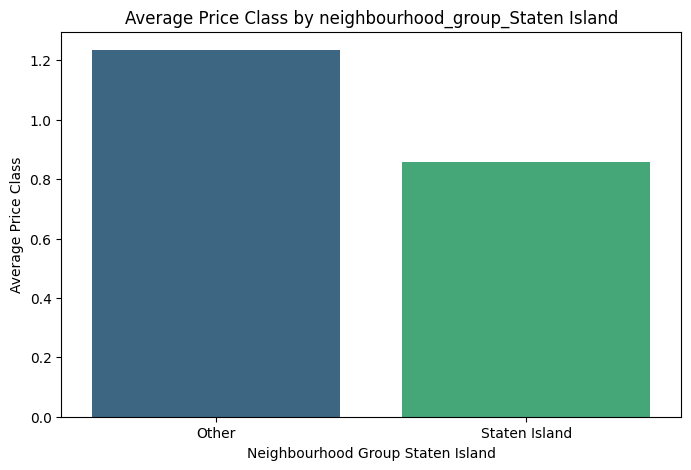

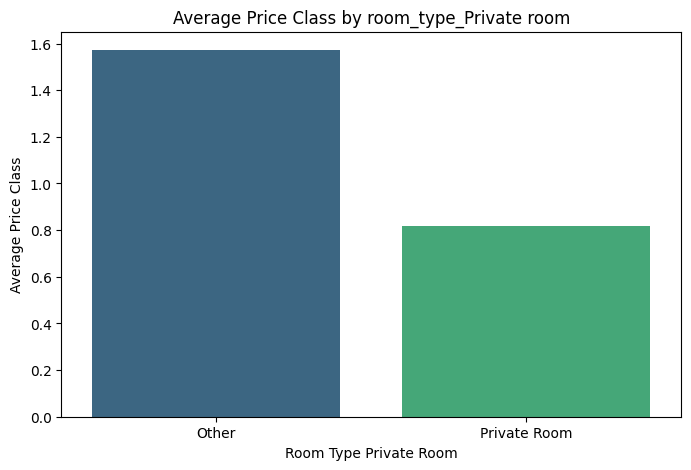

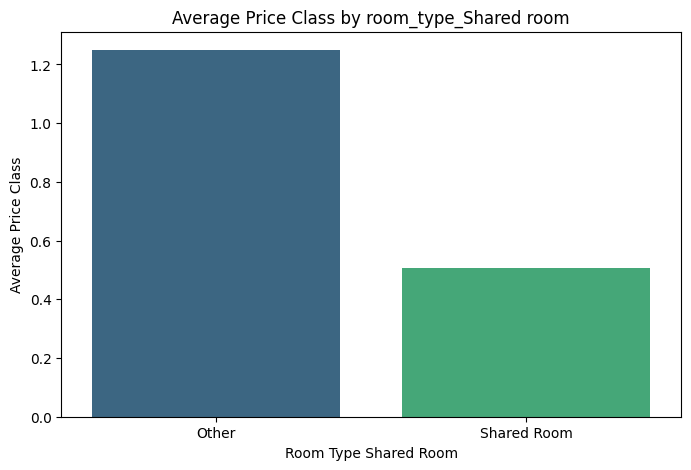

In [14]:
one_hot_cols_to_plot = [
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room'
]

df_temp_encoded = df_raw.copy()
categorical_cols = ['neighbourhood_group', 'room_type']
df_temp_encoded = pd.get_dummies(df_temp_encoded, columns=categorical_cols, drop_first=True, dtype=int)

for col in one_hot_cols_to_plot:
    # Group by the one-hot encoded column from the temporary DataFrame and calculate the mean price_class
    avg_price_class = df_temp_encoded.groupby(col)['price_class'].mean().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='price_class', data=avg_price_class, palette='viridis', hue=col, legend=False)
    plt.title(f'Average Price Class by {col}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Average Price Class')
    plt.xticks(ticks=[0, 1], labels=['Other', col.split('_')[-1].title().replace('group ', '').replace('room ', '')])
    plt.show()

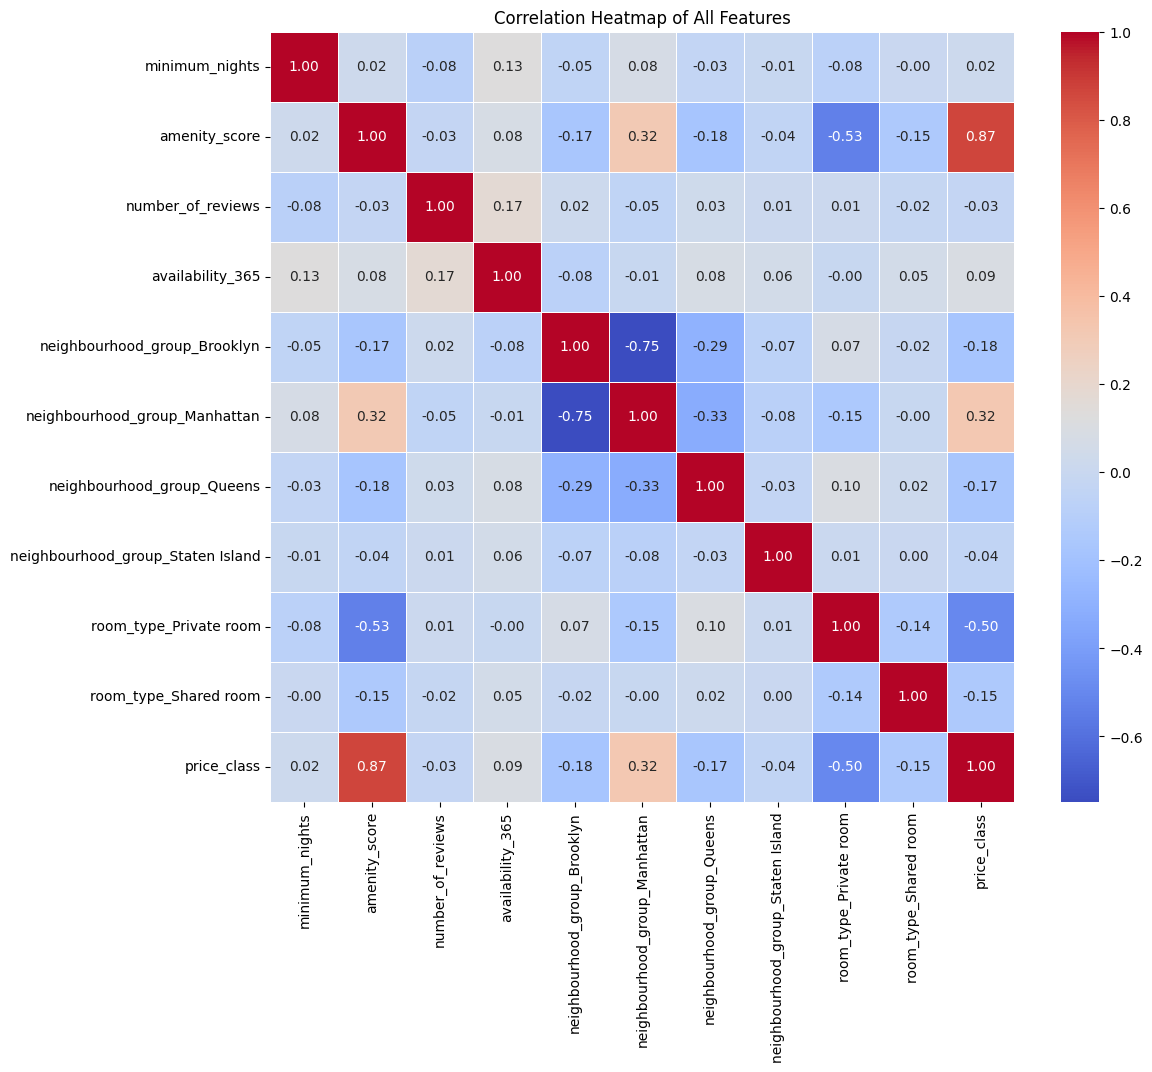

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Correlation matrix among numerical features

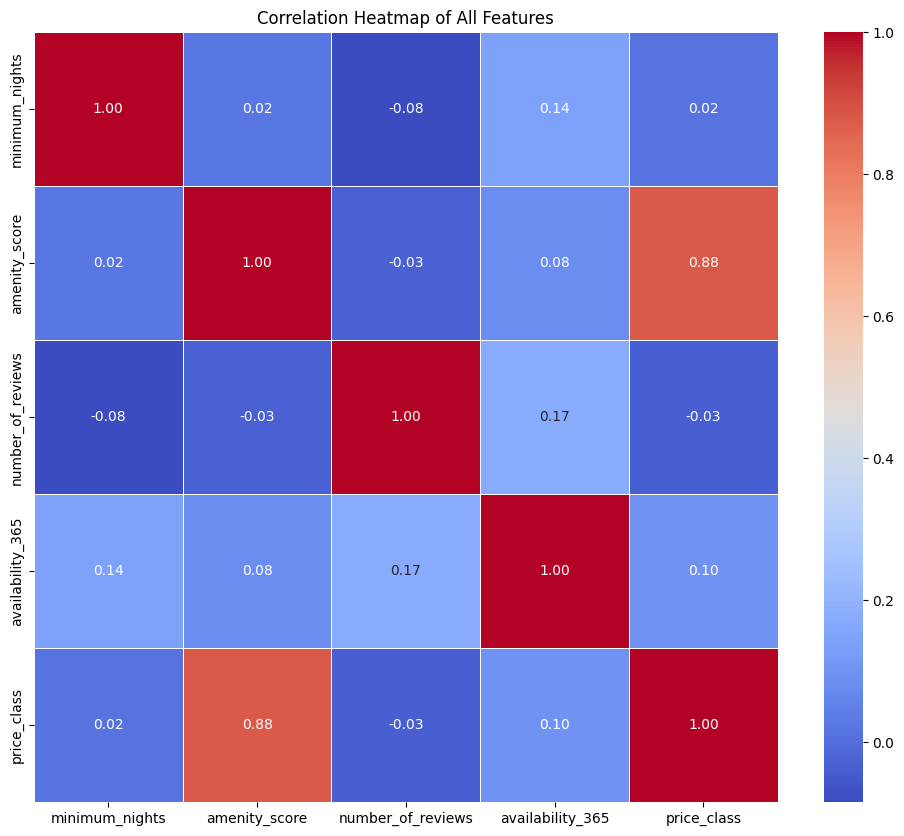

In [16]:
numerical_features_and_target = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365', 'price_class']

plt.figure(figsize=(12, 10))
sns.heatmap(df_raw[numerical_features_and_target].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# amenity_score and price_class:
This pair shows a very strong positive correlation of 0.865. This is the most significant relationship observed among the numerical features. It indicates that as the amenity_score increases, the price_class also tends to increase significantly. This suggests that the availability and quality of amenities are major drivers for the pricing category of a listing.

#  Most influential for prediction

**amenity_score:** This feature stands out as the most influential. It exhibits a very strong positive correlation of 0.865 with price_class (as seen in the numerical correlations discussed, and implicitly visible in the overall correlation heatmap)

**room_type_Private room:** This one-hot encoded feature shows a strong negative correlation of -0.495 with price_class. The bar plots confirm that listings categorized as a 'Private room' tend to have a significantly lower average price_class compared to other room types (especially 'Entire home/apt').

**neighbourhood_group_Manhattan:** This feature has a notable positive correlation of 0.319 with price_class. The bar plots clearly demonstrate that listings in Manhattan have a considerably higher average price_class than those in other neighborhoods.


# Unusually predictive or suspiciously dominant

The feature that appears most dominant is amenity_score with its correlation of 0.865 with price_class.

This can be seen from the correlation matrices.

# Part B (a)



In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    x_exp = np.exp(x - np.max(x, axis = 0, keepdims = True))
    softmax = x_exp / np.sum(x_exp, axis = 0, keepdims = True)
    return softmax

def apply_activation(x, activation_fn):
    return activation_fn(x)

def relu_derivative(x):
    return (x > 0).astype(int)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim):
    np.random.seed(42) # for reproducibility

    W1 = np.random.randn(hidden_dim_1, input_dim) * np.sqrt(2.0 / input_dim)
    b1 = np.zeros((hidden_dim_1, 1))
    W2 = np.random.randn(hidden_dim_2, hidden_dim_1) * np.sqrt(2.0 / hidden_dim_1) # Weights for connection between first and second hidden layer
    b2 = np.zeros((hidden_dim_2, 1))
    W3 = np.random.randn(output_dim, hidden_dim_2) * np.sqrt(2.0 / hidden_dim_2) # Weights for connection between second hidden layer and output
    b3 = np.zeros((output_dim, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return parameters

def cross_entropy_loss(Y_true, A2):
    n_samples = Y_true.shape[1]
    epsilon = 1e-10
    A2 = np.clip(A2, epsilon, 1 - epsilon)
    loss = -np.sum(Y_true * np.log(A2)) / n_samples
    return loss

def linear_forward(X, W, b):
    Z = np.dot(W, X) + b
    return Z

def compute_accuracy(X, Y_true, W1, b1, W2, b2, W3, b3, activation_fn):
    # Forward propagation
    Z1 = linear_forward(X, W1, b1)
    A1 = activation_fn(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = activation_fn(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    # Get predictions
    predictions = np.argmax(A3, axis=0)
    true_labels = np.argmax(Y_true, axis=0)

    # Calculate accuracy
    accuracy = np.mean(predictions == true_labels)
    return accuracy

In [18]:
def three_layer_forward_propagation(X, W1, b1, activation1, W2, b2, activation2, W3, b3, activation3):
    # Layer 1 (Input to First Hidden)
    Z1 = linear_forward(X, W1, b1)
    A1 = apply_activation(Z1, activation1)

    # Layer 2 (First Hidden to Second Hidden)
    Z2 = linear_forward(A1, W2, b2)
    A2 = apply_activation(Z2, activation2)

    # Layer 3 (Second Hidden to Output)
    Z3 = linear_forward(A2, W3, b3)
    A3 = apply_activation(Z3, activation3)

    return A3

In [19]:
def backward_prop(X, Y, parameters, forwardpass_activations, activation_derivative):
  m = X.shape[1]
  W1, b1, W2, b2, W3, b3 = parameters
  Z1, A1, Z2, A2, Z3, A3 = forwardpass_activations

  # layer - 3
  dL_dZ3 = A3 - Y

  dZ3_dW3 = A2.T
  dL_dW3 = (1/m) * np.dot(dL_dZ3, dZ3_dW3)

  dZ3_db3 = 1
  dL_db3 = (1/m) * np.sum(dL_dZ3 , axis=1, keepdims=True)


  # LAYER - 2
  dZ3_dA2 = W3.T
  dL_dA2 = np.dot(dZ3_dA2, dL_dZ3) # Switched positions

  dA2_dZ2 = activation_derivative(Z2) # Here A2 is f(z2)
  dL_dZ2 = dL_dA2 * dA2_dZ2

  dZ2_dW2 = A1.T
  dL_dW2 = (1/m) * np.dot(dL_dZ2, dZ2_dW2)

  dZ2_db2 = 1
  dL_db2 = (1/m) * np.sum(dL_dZ2, axis=1, keepdims=True)


  # LAYER - 1
  dZ2_dA1 = W2.T
  dL_dA1 = np.dot(dZ2_dA1, dL_dZ2)

  dA1_dZ1 = activation_derivative(Z1)
  dL_dZ1 = dL_dA1 * dA1_dZ1

  dZ1_dW1 = X.T
  dL_dW1 = (1/m) * np.dot(dL_dZ1 , dZ1_dW1)

  dZ1_db1 = 1
  dL_db1 = (1/m) * np.sum(dL_dZ1, axis=1, keepdims=True)


  pass_gradients = (dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3)
  return pass_gradients

# **How gradient properties influence optimization and gradient flow**

# Sigmoid (all hidden layers)

**Derivative:** max 0.25, quickly reaches 0 (saturation)


**Result:** vanishing gradients which means early layers learn very slowly or stop


**Optimization:** slow, difficult in deep nets

# ReLU (all hidden layers)

**Derivative:** 0 or 1 (no shrinking when active)


**Result:** good gradient flow when neurons fire


**Optimization:** much faster, enables deep networks


**Main issue:** dying ReLU (neurons permanently off which results in gradient = 0)

In [20]:
input_dim = X_train.shape[1]
output_dim = Y_train_one_hot.shape[0]
hidden_dim_1 = 128
hidden_dim_2 = 64

relu_parameters = init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

print("Neural network parameters initialized for ReLU training.")
print(f"Input Dimension: {input_dim}")
print(f"Output Dimension: {output_dim}")
print("Parameters (weights and biases) for ReLU network:")
for key, value in relu_parameters.items():
    print(f"  {key}: shape {value.shape}")

Neural network parameters initialized for ReLU training.
Input Dimension: 10
Output Dimension: 4
Parameters (weights and biases) for ReLU network:
  W1: shape (128, 10)
  b1: shape (128, 1)
  W2: shape (64, 128)
  b2: shape (64, 1)
  W3: shape (4, 64)
  b3: shape (4, 1)


In [21]:
learning_rate = 0.1
relu_losses = []
relu_train_accuracies = []
relu_val_accuracies = []

W1 = relu_parameters["W1"]
b1 = relu_parameters["b1"]
W2 = relu_parameters["W2"]
b2 = relu_parameters["b2"]
W3 = relu_parameters["W3"]
b3 = relu_parameters["b3"]

X_train_T = X_train.T
X_val_T = X_val.T

for i in range(501):
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = relu(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = relu(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    relu_losses.append(loss)

    # Calculate Training Accuracy
    train_acc = compute_accuracy(X_train_T, Y_train_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_train_accuracies.append(train_acc)

    # Calculate Validation Accuracy
    val_acc = compute_accuracy(X_val_T, Y_val_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_val_accuracies.append(val_acc)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, relu_derivative)

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}, train_acc:f{train_acc}, val_acc:f{val_acc}")

print(f"Final training loss for ReLU network: {relu_losses[-1]:.4f}")
print(f"Final training accuracy: {relu_train_accuracies[-1]:.4f}")
print(f"Final validation accuracy: {relu_val_accuracies[-1]:.4f}")

# Save the trained ReLU model parameters
np.savez('relu_model_params.npz', W1=W1, b1=b1, W2=W2, b2=b2, W3=W3, b3=b3)
print("ReLU model parameters saved to 'relu_model_params.npz'")

Iteration 0, Loss: 2.1409, train_acc:f0.23199709776890984, val_acc:f0.23083434099153566
Iteration 50, Loss: 0.4675, train_acc:f0.8085434427716307, val_acc:f0.8008464328899637
Iteration 100, Loss: 0.4190, train_acc:f0.8202732934276559, val_acc:f0.8148730350665054
Iteration 150, Loss: 0.4008, train_acc:f0.8253521978354194, val_acc:f0.8191051995163241
Iteration 200, Loss: 0.3906, train_acc:f0.8283753552209928, val_acc:f0.8203143893591294
Iteration 250, Loss: 0.3841, train_acc:f0.8297357760445009, val_acc:f0.8211608222490931
Iteration 300, Loss: 0.3794, train_acc:f0.8303101759477598, val_acc:f0.8220072551390568
Iteration 350, Loss: 0.3758, train_acc:f0.8315496704758449, val_acc:f0.8226118500604594
Iteration 400, Loss: 0.3730, train_acc:f0.8324263861176613, val_acc:f0.822974607013301
Iteration 450, Loss: 0.3706, train_acc:f0.8327287018562186, val_acc:f0.8235792019347038
Iteration 500, Loss: 0.3687, train_acc:f0.8330612491686317, val_acc:f0.8230955259975816
Final training loss for ReLU netwo

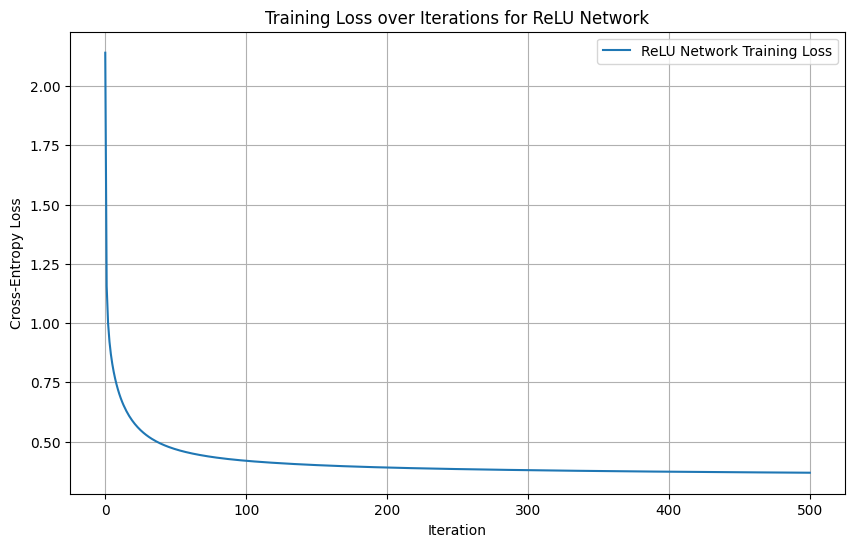

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(relu_losses, label='ReLU Network Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss over Iterations for ReLU Network')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
sigmoid_parameters = init_parameter(input_dim, hidden_dim_1, hidden_dim_2, output_dim)

print("Neural network parameters initialized for Sigmoid training.")
print(f"Input Dimension: {input_dim}")
print(f"Output Dimension: {output_dim}")
print("Parameters (weights and biases) for Sigmoid network:")
for key, value in sigmoid_parameters.items():
    print(f"  {key}: shape {value.shape}")

Neural network parameters initialized for Sigmoid training.
Input Dimension: 10
Output Dimension: 4
Parameters (weights and biases) for Sigmoid network:
  W1: shape (128, 10)
  b1: shape (128, 1)
  W2: shape (64, 128)
  b2: shape (64, 1)
  W3: shape (4, 64)
  b3: shape (4, 1)


In [24]:
learning_rate = 0.1
sigmoid_losses = []
sigmoid_train_accuracies = []
sigmoid_val_accuracies = []

W1 = sigmoid_parameters["W1"]
b1 = sigmoid_parameters["b1"]
W2 = sigmoid_parameters["W2"]
b2 = sigmoid_parameters["b2"]
W3 = sigmoid_parameters["W3"]
b3 = sigmoid_parameters["b3"]

for i in range(501):
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = sigmoid(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = sigmoid(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    sigmoid_losses.append(loss)

    # Calculate Training Accuracy
    train_acc = compute_accuracy(X_train_T, Y_train_one_hot, W1, b1, W2, b2, W3, b3, sigmoid)
    sigmoid_train_accuracies.append(train_acc)

    # Calculate Validation Accuracy
    val_acc = compute_accuracy(X_val_T, Y_val_one_hot, W1, b1, W2, b2, W3, b3, sigmoid)
    sigmoid_val_accuracies.append(val_acc)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, sigmoid_derivative)

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}, train_acc: {train_acc} val_acc: {val_acc}")

print(f"Final training loss for Sigmoid network: {sigmoid_losses[-1]:.4f}")
print(f"Final training accuracy: {sigmoid_train_accuracies[-1]:.4f}")
print(f"Final validation accuracy: {sigmoid_val_accuracies[-1]:.4f}")

# Save the trained Sigmoid model parameters
np.savez('sigmoid_model_params.npz', W1=W1, b1=b1, W2=W2, b2=b2, W3=W3, b3=b3)
print("Sigmoid model parameters saved to 'sigmoid_model_params.npz'")

Iteration 0, Loss: 1.6689, train_acc: 0.23807364411391257 val_acc: 0.23808948004836758
Iteration 50, Loss: 0.9917, train_acc: 0.563183989358486 val_acc: 0.5632406287787183
Iteration 100, Loss: 0.8725, train_acc: 0.6430255759114819 val_acc: 0.6408706166868199
Iteration 150, Loss: 0.7679, train_acc: 0.6982888929197654 val_acc: 0.6934703748488513
Iteration 200, Loss: 0.6879, train_acc: 0.7114698591208658 val_acc: 0.7066505441354293
Iteration 250, Loss: 0.6284, train_acc: 0.7355341919100309 val_acc: 0.728174123337364
Iteration 300, Loss: 0.5839, train_acc: 0.7666727129814378 val_acc: 0.7646916565900846
Iteration 350, Loss: 0.5503, train_acc: 0.7835419311929379 val_acc: 0.779322853688029
Iteration 400, Loss: 0.5244, train_acc: 0.7929439506620715 val_acc: 0.7873035066505442
Iteration 450, Loss: 0.5042, train_acc: 0.7979623919221235 val_acc: 0.7939540507859734
Iteration 500, Loss: 0.4880, train_acc: 0.8009855493076969 val_acc: 0.7985489721886336
Final training loss for Sigmoid network: 0.4880

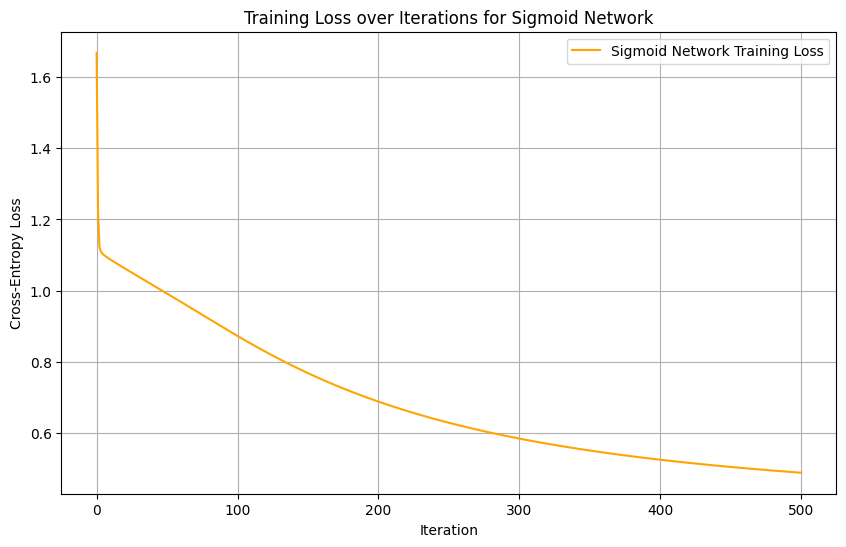

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(sigmoid_losses, label='Sigmoid Network Training Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss over Iterations for Sigmoid Network')
plt.grid(True)
plt.legend()
plt.show()

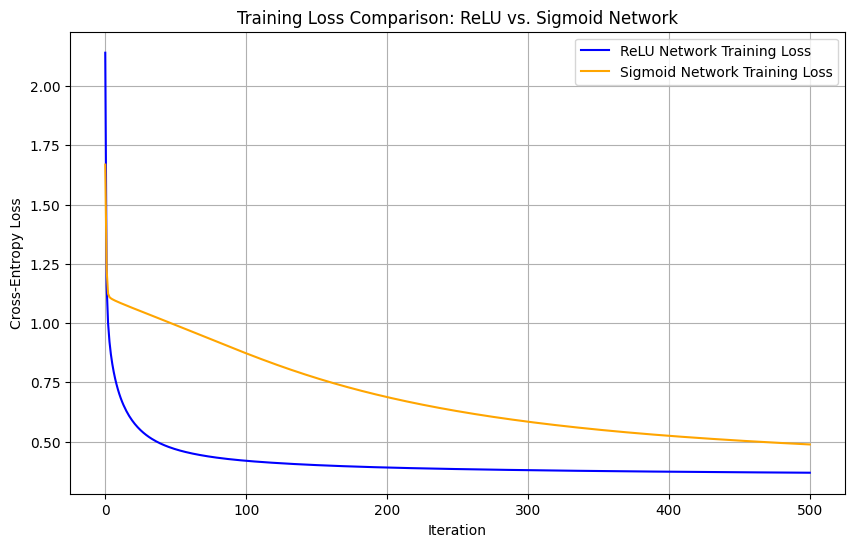

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(relu_losses, label='ReLU Network Training Loss', color='blue')
plt.plot(sigmoid_losses, label='Sigmoid Network Training Loss', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Comparison: ReLU vs. Sigmoid Network')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# Final Accuracy Report for Both Activation Functions
print("=" * 70)
print("FINAL ACCURACY REPORT")
print("=" * 70)
print("\n--- ReLU Activation Function ---")
print(f"Training Accuracy:   {relu_train_accuracies[-1]:.4f} ({relu_train_accuracies[-1]*100:.2f}%)")
print(f"Validation Accuracy: {relu_val_accuracies[-1]:.4f} ({relu_val_accuracies[-1]*100:.2f}%)")
print(f"Accuracy Improvement: {(relu_val_accuracies[-1] - relu_train_accuracies[-1]):.4f}")

print("\n--- Sigmoid Activation Function ---")
print(f"Training Accuracy:   {sigmoid_train_accuracies[-1]:.4f} ({sigmoid_train_accuracies[-1]*100:.2f}%)")
print(f"Validation Accuracy: {sigmoid_val_accuracies[-1]:.4f} ({sigmoid_val_accuracies[-1]*100:.2f}%)")
print(f"Accuracy Improvement: {(sigmoid_val_accuracies[-1] - sigmoid_train_accuracies[-1]):.4f}")

print("\n--- Comparison ---")
print(f"ReLU Final Train Acc - Sigmoid Final Train Acc: {relu_train_accuracies[-1] - sigmoid_train_accuracies[-1]:.4f}")
print(f"ReLU Final Val Acc - Sigmoid Final Val Acc: {relu_val_accuracies[-1] - sigmoid_val_accuracies[-1]:.4f}")
print("=" * 70)

FINAL ACCURACY REPORT

--- ReLU Activation Function ---
Training Accuracy:   0.8331 (83.31%)
Validation Accuracy: 0.8231 (82.31%)
Accuracy Improvement: -0.0100

--- Sigmoid Activation Function ---
Training Accuracy:   0.8010 (80.10%)
Validation Accuracy: 0.7985 (79.85%)
Accuracy Improvement: -0.0024

--- Comparison ---
ReLU Final Train Acc - Sigmoid Final Train Acc: 0.0321
ReLU Final Val Acc - Sigmoid Final Val Acc: 0.0245


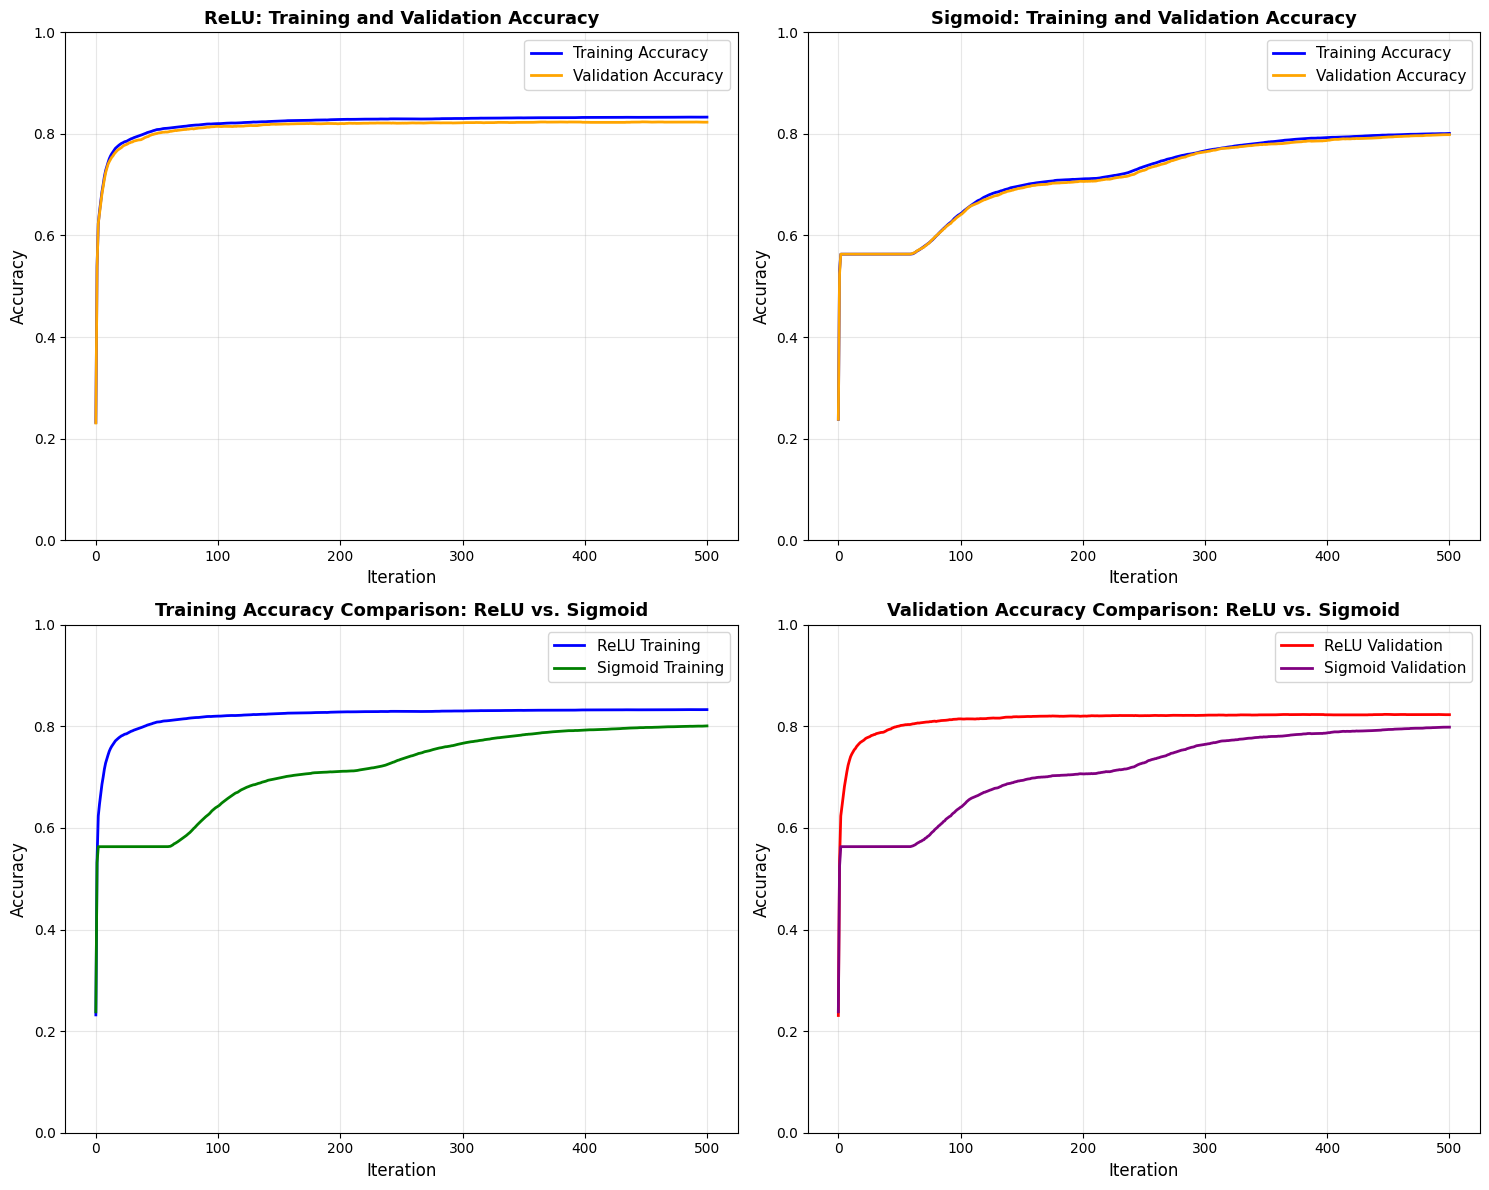

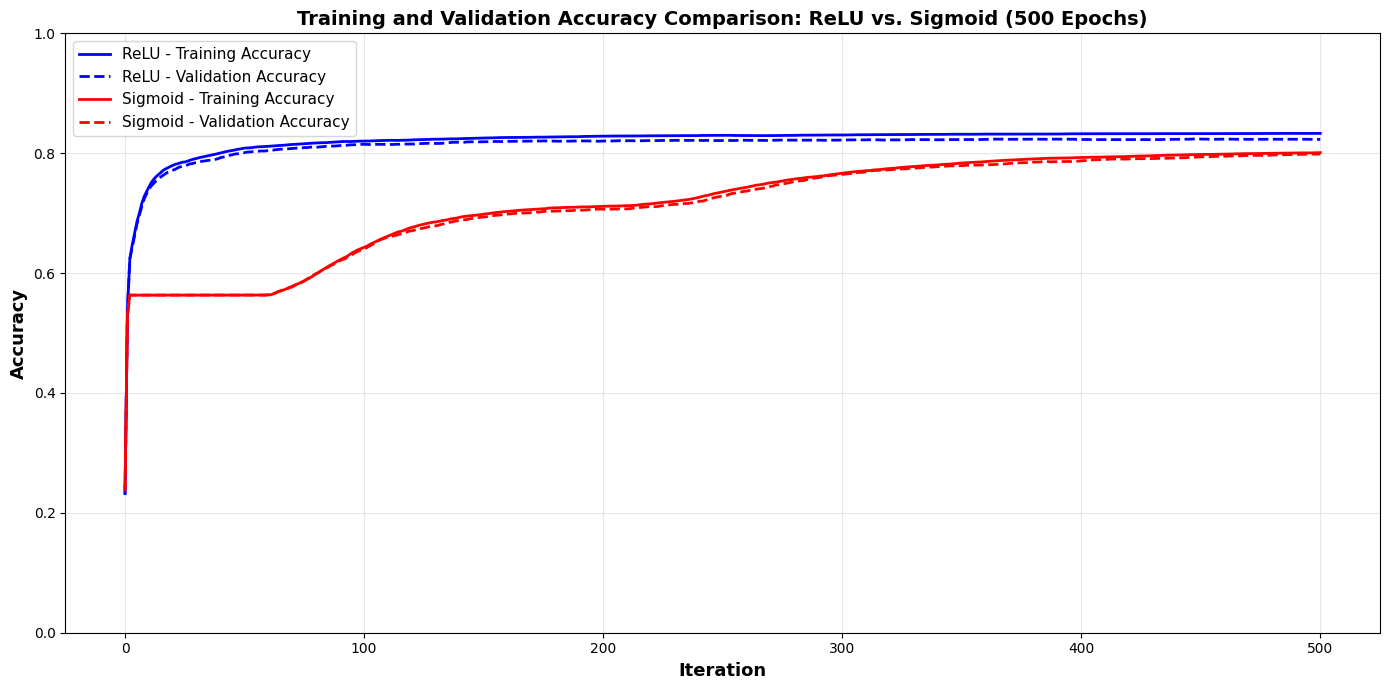

In [28]:
# Comprehensive plot showing training and validation accuracy for both activation functions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ReLU Training and Validation Accuracy
axes[0, 0].plot(relu_train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
axes[0, 0].plot(relu_val_accuracies, label='Validation Accuracy', color='orange', linewidth=2)
axes[0, 0].set_xlabel('Iteration', fontsize=12)
axes[0, 0].set_ylabel('Accuracy', fontsize=12)
axes[0, 0].set_title('ReLU: Training and Validation Accuracy', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(fontsize=11)
axes[0, 0].set_ylim([0, 1])

# Sigmoid Training and Validation Accuracy
axes[0, 1].plot(sigmoid_train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
axes[0, 1].plot(sigmoid_val_accuracies, label='Validation Accuracy', color='orange', linewidth=2)
axes[0, 1].set_xlabel('Iteration', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].set_title('Sigmoid: Training and Validation Accuracy', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend(fontsize=11)
axes[0, 1].set_ylim([0, 1])

# Combined Training Accuracy Comparison
axes[1, 0].plot(relu_train_accuracies, label='ReLU Training', color='blue', linewidth=2)
axes[1, 0].plot(sigmoid_train_accuracies, label='Sigmoid Training', color='green', linewidth=2)
axes[1, 0].set_xlabel('Iteration', fontsize=12)
axes[1, 0].set_ylabel('Accuracy', fontsize=12)
axes[1, 0].set_title('Training Accuracy Comparison: ReLU vs. Sigmoid', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=11)
axes[1, 0].set_ylim([0, 1])

# Combined Validation Accuracy Comparison
axes[1, 1].plot(relu_val_accuracies, label='ReLU Validation', color='red', linewidth=2)
axes[1, 1].plot(sigmoid_val_accuracies, label='Sigmoid Validation', color='purple', linewidth=2)
axes[1, 1].set_xlabel('Iteration', fontsize=12)
axes[1, 1].set_ylabel('Accuracy', fontsize=12)
axes[1, 1].set_title('Validation Accuracy Comparison: ReLU vs. Sigmoid', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend(fontsize=11)
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

# Single comprehensive plot with all accuracies
plt.figure(figsize=(14, 7))
plt.plot(relu_train_accuracies, label='ReLU - Training Accuracy', color='blue', linewidth=2)
plt.plot(relu_val_accuracies, label='ReLU - Validation Accuracy', color='blue', linewidth=2, linestyle='--')
plt.plot(sigmoid_train_accuracies, label='Sigmoid - Training Accuracy', color='red', linewidth=2)
plt.plot(sigmoid_val_accuracies, label='Sigmoid - Validation Accuracy', color='red', linewidth=2, linestyle='--')
plt.xlabel('Iteration', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.title('Training and Validation Accuracy Comparison: ReLU vs. Sigmoid (500 Epochs)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='best')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# Part B (b)

*Note: Using the same training loop as above to incorporate gradient magnitudes*

In [29]:
learning_rate = 0.1
relu_losses = []
relu_train_accuracies = []
relu_val_accuracies = []

# Initialize lists to store gradient magnitudes
relu_grad_mag_W1 = []
relu_grad_mag_W2 = []

W1 = relu_parameters["W1"]
b1 = relu_parameters["b1"]
W2 = relu_parameters["W2"]
b2 = relu_parameters["b2"]
W3 = relu_parameters["W3"]
b3 = relu_parameters["b3"]

X_train_T = X_train.T
X_val_T = X_val.T

for i in range(1001):
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = relu(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = relu(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    relu_losses.append(loss)

    # Calculate Training Accuracy
    train_acc = compute_accuracy(X_train_T, Y_train_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_train_accuracies.append(train_acc)

    # Calculate Validation Accuracy
    val_acc = compute_accuracy(X_val_T, Y_val_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_val_accuracies.append(val_acc)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, relu_derivative)

    # Calculate and store gradient magnitudes
    relu_grad_mag_W1.append(np.linalg.norm(dL_dW1, ord='fro'))
    relu_grad_mag_W2.append(np.linalg.norm(dL_dW2, ord='fro'))

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}, train_acc:f{train_acc}, val_acc:f{val_acc}")

print(f"Final training loss for ReLU network: {relu_losses[-1]:.4f}")
print(f"Final training accuracy: {relu_train_accuracies[-1]:.4f}")
print(f"Final validation accuracy: {relu_val_accuracies[-1]:.4f}")


Iteration 0, Loss: 2.1409, train_acc:f0.23199709776890984, val_acc:f0.23083434099153566
Iteration 50, Loss: 0.4675, train_acc:f0.8085434427716307, val_acc:f0.8008464328899637
Iteration 100, Loss: 0.4190, train_acc:f0.8202732934276559, val_acc:f0.8148730350665054
Iteration 150, Loss: 0.4008, train_acc:f0.8253521978354194, val_acc:f0.8191051995163241
Iteration 200, Loss: 0.3906, train_acc:f0.8283753552209928, val_acc:f0.8203143893591294
Iteration 250, Loss: 0.3841, train_acc:f0.8297357760445009, val_acc:f0.8211608222490931
Iteration 300, Loss: 0.3794, train_acc:f0.8303101759477598, val_acc:f0.8220072551390568
Iteration 350, Loss: 0.3758, train_acc:f0.8315496704758449, val_acc:f0.8226118500604594
Iteration 400, Loss: 0.3730, train_acc:f0.8324263861176613, val_acc:f0.822974607013301
Iteration 450, Loss: 0.3706, train_acc:f0.8327287018562186, val_acc:f0.8235792019347038
Iteration 500, Loss: 0.3687, train_acc:f0.8330612491686317, val_acc:f0.8230955259975816
Iteration 550, Loss: 0.3670, train

In [30]:
learning_rate = 0.1
sigmoid_losses = []
sigmoid_train_accuracies = []
sigmoid_val_accuracies = []

# Initialize lists to store gradient magnitudes for Sigmoid network
sigmoid_grad_mag_W1 = []
sigmoid_grad_mag_W2 = []

W1 = sigmoid_parameters["W1"]
b1 = sigmoid_parameters["b1"]
W2 = sigmoid_parameters["W2"]
b2 = sigmoid_parameters["b2"]
W3 = sigmoid_parameters["W3"]
b3 = sigmoid_parameters["b3"]

for i in range(1001):
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = sigmoid(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = sigmoid(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    sigmoid_losses.append(loss)

    # Calculate Training Accuracy
    train_acc = compute_accuracy(X_train_T, Y_train_one_hot, W1, b1, W2, b2, W3, b3, sigmoid)
    sigmoid_train_accuracies.append(train_acc)

    # Calculate Validation Accuracy
    val_acc = compute_accuracy(X_val_T, Y_val_one_hot, W1, b1, W2, b2, W3, b3, sigmoid)
    sigmoid_val_accuracies.append(val_acc)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, sigmoid_derivative)

    # Calculate and store gradient magnitudes
    sigmoid_grad_mag_W1.append(np.linalg.norm(dL_dW1, ord='fro'))
    sigmoid_grad_mag_W2.append(np.linalg.norm(dL_dW2, ord='fro'))

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}, train_acc: {train_acc} val_acc: {val_acc}")

print(f"Final training loss for Sigmoid network: {sigmoid_losses[-1]:.4f}")
print(f"Final training accuracy: {sigmoid_train_accuracies[-1]:.4f}")
print(f"Final validation accuracy: {sigmoid_val_accuracies[-1]:.4f}")

Iteration 0, Loss: 1.6689, train_acc: 0.23807364411391257 val_acc: 0.23808948004836758
Iteration 50, Loss: 0.9917, train_acc: 0.563183989358486 val_acc: 0.5632406287787183
Iteration 100, Loss: 0.8725, train_acc: 0.6430255759114819 val_acc: 0.6408706166868199
Iteration 150, Loss: 0.7679, train_acc: 0.6982888929197654 val_acc: 0.6934703748488513
Iteration 200, Loss: 0.6879, train_acc: 0.7114698591208658 val_acc: 0.7066505441354293
Iteration 250, Loss: 0.6284, train_acc: 0.7355341919100309 val_acc: 0.728174123337364
Iteration 300, Loss: 0.5839, train_acc: 0.7666727129814378 val_acc: 0.7646916565900846
Iteration 350, Loss: 0.5503, train_acc: 0.7835419311929379 val_acc: 0.779322853688029
Iteration 400, Loss: 0.5244, train_acc: 0.7929439506620715 val_acc: 0.7873035066505442
Iteration 450, Loss: 0.5042, train_acc: 0.7979623919221235 val_acc: 0.7939540507859734
Iteration 500, Loss: 0.4880, train_acc: 0.8009855493076969 val_acc: 0.7985489721886336
Iteration 550, Loss: 0.4748, train_acc: 0.80249

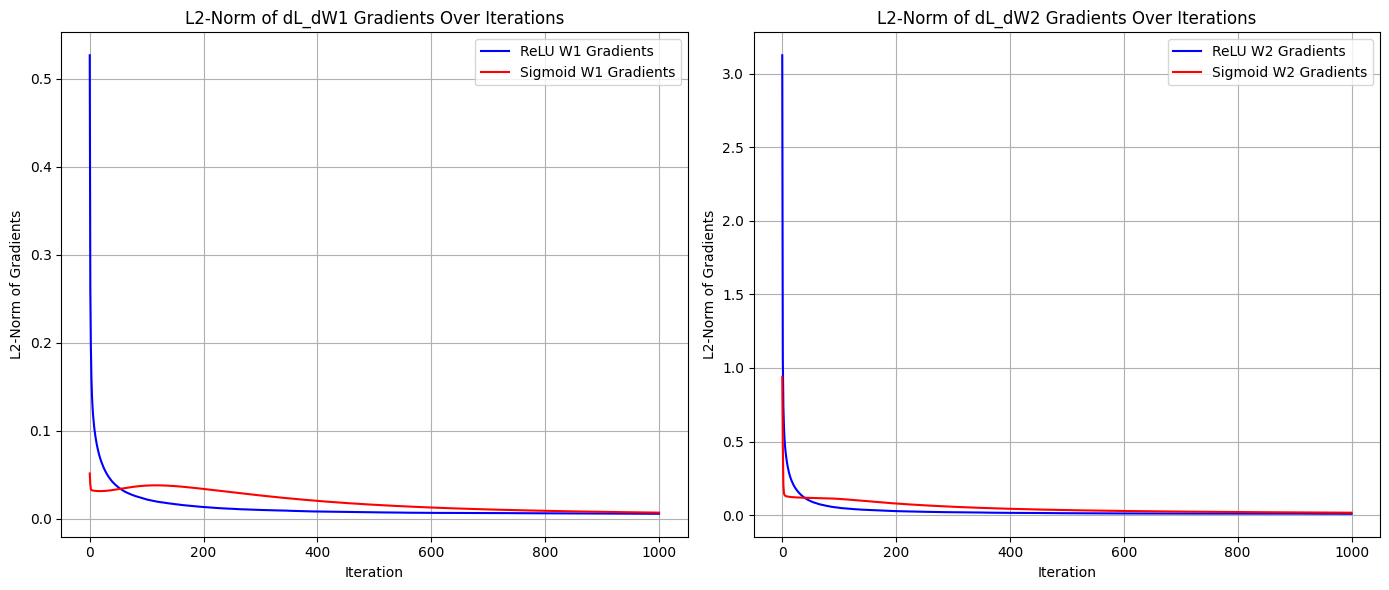

In [31]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(relu_grad_mag_W1, label='ReLU W1 Gradients', color='blue')
plt.plot(sigmoid_grad_mag_W1, label='Sigmoid W1 Gradients', color='red')
plt.title('L2-Norm of dL_dW1 Gradients Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('L2-Norm of Gradients')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(relu_grad_mag_W2, label='ReLU W2 Gradients', color='blue')
plt.plot(sigmoid_grad_mag_W2, label='Sigmoid W2 Gradients', color='red')
plt.title('L2-Norm of dL_dW2 Gradients Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('L2-Norm of Gradients')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Observation

The graphs show that ReLU preserves gradient strength across layers and iterations, while sigmoid causes gradient shrinkage, leading to slower and less effective learning in deep networks.

# Part C (b)

In [32]:
def input_gradient_attribution(X, parameters, activation_fn, activation_deriv):
    W1, b1 = parameters['W1'], parameters['b1']
    W2, b2 = parameters['W2'], parameters['b2']
    W3, b3 = parameters['W3'], parameters['b3']

    # Forward pass
    Z1 = linear_forward(X, W1, b1)
    A1 = activation_fn(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = activation_fn(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    dScore_dX = np.zeros_like(X)

    for i in range(X.shape[1]):
        # Choose predicted class
        m = np.argmax(A3[:, i])

        dZ3 = np.zeros((A3.shape[0], 1))
        dZ3[m, 0] = 1

        # Backprop
        dA2 = np.dot(W3.T, dZ3)
        dZ2 = dA2 * activation_deriv(Z2[:, i:i+1])

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * activation_deriv(Z1[:, i:i+1])

        dScore_dX[:, i:i+1] = np.dot(W1.T, dZ1)

    feature_importance = np.mean(np.abs(dScore_dX), axis=1)

    return feature_importance, dScore_dX

# Psuedo Code

Extract weights and biases (W1, b1, W2, b2, W3, b3) from the dictionary.

Compute linear outputs (Z) and activations (A) for all three layers.

Create a zero matrix matching the shape of input X to store gradients.

Iterate through each input sample individually.

Find the index of the highest predicted class score for the current sample.

Create a one-hot vector targeting only the predicted class score.

Calculate gradients for hidden layer 2 (dA2, dZ2).

Calculate gradients for hidden layer 1 (dA1, dZ1).

Compute the final gradient with respect to the input features.

Average the absolute gradients across all samples to rank feature importance.

In [33]:
learning_rate = 0.1
relu_losses = []
relu_train_accuracies = []
relu_val_accuracies = []

W1 = relu_parameters["W1"]
b1 = relu_parameters["b1"]
W2 = relu_parameters["W2"]
b2 = relu_parameters["b2"]
W3 = relu_parameters["W3"]
b3 = relu_parameters["b3"]

X_train_T = X_train.T
X_val_T = X_val.T

for i in range(501):
    # Forward Propagation
    Z1 = linear_forward(X_train_T, W1, b1)
    A1 = relu(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = relu(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    forwardpass_activations = (Z1, A1, Z2, A2, Z3, A3)

    # Calculate Loss
    loss = cross_entropy_loss(Y_train_one_hot, A3)
    relu_losses.append(loss)

    # Calculate Training Accuracy
    train_acc = compute_accuracy(X_train_T, Y_train_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_train_accuracies.append(train_acc)

    # Calculate Validation Accuracy
    val_acc = compute_accuracy(X_val_T, Y_val_one_hot, W1, b1, W2, b2, W3, b3, relu)
    relu_val_accuracies.append(val_acc)

    # Backward Propagation
    current_parameters = (W1, b1, W2, b2, W3, b3)
    dL_dW1, dL_db1, dL_dW2, dL_db2, dL_dW3, dL_db3 = backward_prop(X_train_T, Y_train_one_hot, current_parameters, forwardpass_activations, relu_derivative)

    # Update Parameters
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W3 = W3 - learning_rate * dL_dW3
    b3 = b3 - learning_rate * dL_db3

    if i % 50 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}, train_acc:f{train_acc}, val_acc:f{val_acc}")

print(f"Final training loss for ReLU network: {relu_losses[-1]:.4f}")
print(f"Final training accuracy: {relu_train_accuracies[-1]:.4f}")
print(f"Final validation accuracy: {relu_val_accuracies[-1]:.4f}")

Iteration 0, Loss: 2.1409, train_acc:f0.23199709776890984, val_acc:f0.23083434099153566
Iteration 50, Loss: 0.4675, train_acc:f0.8085434427716307, val_acc:f0.8008464328899637
Iteration 100, Loss: 0.4190, train_acc:f0.8202732934276559, val_acc:f0.8148730350665054
Iteration 150, Loss: 0.4008, train_acc:f0.8253521978354194, val_acc:f0.8191051995163241
Iteration 200, Loss: 0.3906, train_acc:f0.8283753552209928, val_acc:f0.8203143893591294
Iteration 250, Loss: 0.3841, train_acc:f0.8297357760445009, val_acc:f0.8211608222490931
Iteration 300, Loss: 0.3794, train_acc:f0.8303101759477598, val_acc:f0.8220072551390568
Iteration 350, Loss: 0.3758, train_acc:f0.8315496704758449, val_acc:f0.8226118500604594
Iteration 400, Loss: 0.3730, train_acc:f0.8324263861176613, val_acc:f0.822974607013301
Iteration 450, Loss: 0.3706, train_acc:f0.8327287018562186, val_acc:f0.8235792019347038
Iteration 500, Loss: 0.3687, train_acc:f0.8330612491686317, val_acc:f0.8230955259975816
Final training loss for ReLU netwo

In [34]:
# Apply function to ReLU network
relu_params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
# X_train_T.values provides the NumPy array of the transposed training data, which has shape (num_features, num_samples)
importance, _ = input_gradient_attribution(X_train_T.values, relu_params, relu, relu_derivative)

# Ranked features
ranked = sorted(enumerate(importance), key=lambda x: x[1], reverse=True)

print("FEATURE IMPORTANCE RANKING (ReLU Network)\n")
print(f"{'Rank':<6} {'Feature':<30} {'Score':<15} {'%':<8}")
print("-" * 60)
for rank, (feat, score) in enumerate(ranked, 1):
    pct = 100 * score / ranked[0][1]
    print(f"{rank:<6} {X_train.columns[feat]:<30} {score:<15.6f} {pct:<8.1f}%")

FEATURE IMPORTANCE RANKING (ReLU Network)

Rank   Feature                        Score           %       
------------------------------------------------------------
1      amenity_score                  2.226280        100.0   %
2      neighbourhood_group_Brooklyn   1.547807        69.5    %
3      neighbourhood_group_Manhattan  1.328582        59.7    %
4      neighbourhood_group_Queens     0.950902        42.7    %
5      room_type_Shared room          0.942151        42.3    %
6      room_type_Private room         0.695706        31.2    %
7      neighbourhood_group_Staten Island 0.588980        26.5    %
8      availability_365               0.491570        22.1    %
9      number_of_reviews              0.441513        19.8    %
10     minimum_nights                 0.439800        19.8    %


Our gradient attribution results largely align with and further emphasize the key findings from the EDA:

**amenity_score:** Our EDA revealed an exceptionally strong positive correlation of 0.865 between amenity_score and price_class. The gradient attribution strongly reinforces this, showing amenity_score as the most dominant feature for the neural network. This suggests the model has learned to heavily rely on this feature, mirroring its strong predictive power identified early on.


**neighbourhood_group_Manhattan:** In EDA, we saw a notable positive correlation of 0.319 for Manhattan with price_class, indicating higher prices. The gradient attribution ranks it very high as well, confirming the model's reliance on this feature to predict higher price classes.


**room_type_Private room:** EDA revealed a strong negative correlation of -0.496 with price_class. The gradient attribution confirms its influence, indicating that being a 'Private room' significantly impacts the price class prediction, generally leading to lower classes.

# Part D

In [35]:
df_test_raw = pd.read_csv('/content/test.csv')
print("Test data loaded into df_test_raw. First 5 rows:")
print(df_test_raw.head())

Test data loaded into df_test_raw. First 5 rows:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0            Brooklyn  Entire home/apt               2           84.3   
1            Brooklyn     Private room               7           79.5   
2           Manhattan     Private room               3           97.1   
3           Manhattan     Private room               3           77.4   
4           Manhattan  Entire home/apt               2           28.7   

   number_of_reviews  availability_365  price_class  
0                127               270            2  
1                  0               176            1  
2                 17                65            2  
3                  2                 0            1  
4                 27               180            2  


In [36]:
X_test = df_test_raw.drop('price_class', axis=1)
Y_test = df_test_raw['price_class']

print("Features (X_test) head:")
print(X_test.head())
print("\nTarget (Y_test) head:")
print(Y_test.head())

Features (X_test) head:
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0            Brooklyn  Entire home/apt               2           84.3   
1            Brooklyn     Private room               7           79.5   
2           Manhattan     Private room               3           97.1   
3           Manhattan     Private room               3           77.4   
4           Manhattan  Entire home/apt               2           28.7   

   number_of_reviews  availability_365  
0                127               270  
1                  0               176  
2                 17                65  
3                  2                 0  
4                 27               180  

Target (Y_test) head:
0    2
1    1
2    2
3    1
4    2
Name: price_class, dtype: int64


In [37]:
for col in numerical_cols_with_missing:
    X_test[col] = X_test[col].fillna(imputation_values[col])
    print(f"Imputed numerical column '{col}' in X_test with median: {imputation_values[col]}")

for col in categorical_cols_with_missing:
    X_test[col] = X_test[col].fillna(imputation_values[col])
    print(f"Imputed categorical column '{col}' in X_test with mode: {imputation_values[col]}")

print("\nMissing values in X_test after imputation:")
print(X_test[numerical_cols_with_missing + categorical_cols_with_missing].isnull().sum())

Imputed numerical column 'minimum_nights' in X_test with median: 3.0
Imputed numerical column 'amenity_score' in X_test with median: 51.5
Imputed numerical column 'number_of_reviews' in X_test with median: 5.0
Imputed numerical column 'availability_365' in X_test with median: 43.0
Imputed categorical column 'neighbourhood_group' in X_test with mode: Manhattan
Imputed categorical column 'room_type' in X_test with mode: Entire home/apt

Missing values in X_test after imputation:
minimum_nights         0
amenity_score          0
number_of_reviews      0
availability_365       0
neighbourhood_group    0
room_type              0
dtype: int64


In [38]:
X_test = pd.get_dummies(X_test, columns=categorical_cols_with_missing, drop_first=True, dtype=int)

test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train_from_test = set(test_cols) - set(train_cols)
for c in missing_in_train_from_test:
    X_test = X_test.drop(columns=[c])

X_test = X_test[train_cols]

print("First 5 rows of X_test after one-hot encoding:")
print(X_test.head())
print("\nShape of X_test after encoding:", X_test.shape)

First 5 rows of X_test after one-hot encoding:
   minimum_nights  amenity_score  number_of_reviews  availability_365  \
0               2           84.3                127               270   
1               7           79.5                  0               176   
2               3           97.1                 17                65   
3               3           77.4                  2                 0   
4               2           28.7                 27               180   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1                              0   
1                             1                              0   
2                             0                              1   
3                             0                              1   
4                             0                              1   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                           0                    

In [39]:
X_test[numerical_cols_with_missing] = scaler.transform(X_test[numerical_cols_with_missing])

print("First 5 rows of X_test after standardization:")
print(X_test.head())

First 5 rows of X_test after standardization:
   minimum_nights  amenity_score  number_of_reviews  availability_365  \
0       -0.252373       1.677383           2.386005          1.218588   
1        0.004824       1.427857          -0.524901          0.499042   
2       -0.200934       2.342784          -0.135252         -0.350633   
3       -0.200934       1.318690          -0.479059         -0.848191   
4       -0.252373      -1.212954           0.093953          0.529661   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                             1                              0   
1                             1                              0   
2                             0                              1   
3                             0                              1   
4                             0                              1   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                           0                     

In [40]:
Y_test_one_hot = pd.get_dummies(Y_test, dtype=int).values.T

print("Shape of Y_test_one_hot:", Y_test_one_hot.shape)
print("First 5 columns of Y_test_one_hot:\n", Y_test_one_hot[:, :5])

Shape of Y_test_one_hot: (4, 7297)
First 5 columns of Y_test_one_hot:
 [[0 0 0 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 0 0 0 0]]


In [41]:
relu_params_loaded = np.load('relu_model_params.npz')

relu_W1 = relu_params_loaded['W1']
relu_b1 = relu_params_loaded['b1']
relu_W2 = relu_params_loaded['W2']
relu_b2 = relu_params_loaded['b2']
relu_W3 = relu_params_loaded['W3']
relu_b3 = relu_params_loaded['b3']

print("ReLU model parameters loaded successfully.")
print(f"relu_W1 shape: {relu_W1.shape}")
print(f"relu_b1 shape: {relu_b1.shape}")
print(f"relu_W2 shape: {relu_W2.shape}")
print(f"relu_b2 shape: {relu_b2.shape}")
print(f"relu_W3 shape: {relu_W3.shape}")
print(f"relu_b3 shape: {relu_b3.shape}")

ReLU model parameters loaded successfully.
relu_W1 shape: (128, 10)
relu_b1 shape: (128, 1)
relu_W2 shape: (64, 128)
relu_b2 shape: (64, 1)
relu_W3 shape: (4, 64)
relu_b3 shape: (4, 1)


In [42]:
def predict(X, W1, b1, W2, b2, W3, b3, activation_fn):
    """Performs forward propagation to get predictions."""
    Z1 = linear_forward(X, W1, b1)
    A1 = activation_fn(Z1)

    Z2 = linear_forward(A1, W2, b2)
    A2 = activation_fn(Z2)

    Z3 = linear_forward(A2, W3, b3)
    A3 = softmax(Z3)

    return np.argmax(A3, axis=0)

X_test_T = X_test.T
relu_predictions = predict(X_test_T.values, relu_W1, relu_b1, relu_W2, relu_b2, relu_W3, relu_b3, relu)

print("Predictions for the test set using ReLU model:")
print(relu_predictions[:10]) # Display first 10 predictions
print(f"Shape of predictions: {relu_predictions.shape}")

Predictions for the test set using ReLU model:
[2 2 3 2 1 2 1 3 1 1]
Shape of predictions: (7297,)


In [43]:
Y_test_labels = Y_test.values # Convert Y_test Series to a NumPy array for comparison

# Calculate accuracy
relu_test_accuracy = np.mean(relu_predictions == Y_test_labels)

print(f"ReLU Model Test Accuracy: {relu_test_accuracy:.4f} ({relu_test_accuracy*100:.2f}%)")

ReLU Model Test Accuracy: 0.3478 (34.78%)


In [44]:
sigmoid_params_loaded = np.load('sigmoid_model_params.npz')

sigmoid_W1 = sigmoid_params_loaded['W1']
sigmoid_b1 = sigmoid_params_loaded['b1']
sigmoid_W2 = sigmoid_params_loaded['W2']
sigmoid_b2 = sigmoid_params_loaded['b2']
sigmoid_W3 = sigmoid_params_loaded['W3']
sigmoid_b3 = sigmoid_params_loaded['b3']

print("Sigmoid model parameters loaded successfully.")
print(f"sigmoid_W1 shape: {sigmoid_W1.shape}")
print(f"sigmoid_b1 shape: {sigmoid_b1.shape}")
print(f"sigmoid_W2 shape: {sigmoid_W2.shape}")
print(f"sigmoid_b2 shape: {sigmoid_b2.shape}")
print(f"sigmoid_W3 shape: {sigmoid_W3.shape}")
print(f"sigmoid_b3 shape: {sigmoid_b3.shape}")

Sigmoid model parameters loaded successfully.
sigmoid_W1 shape: (128, 10)
sigmoid_b1 shape: (128, 1)
sigmoid_W2 shape: (64, 128)
sigmoid_b2 shape: (64, 1)
sigmoid_W3 shape: (4, 64)
sigmoid_b3 shape: (4, 1)


In [45]:
sigmoid_predictions = predict(X_test_T.values, sigmoid_W1, sigmoid_b1, sigmoid_W2, sigmoid_b2, sigmoid_W3, sigmoid_b3, sigmoid)

print("Predictions for the test set using Sigmoid model:")
print(sigmoid_predictions[:10]) # Display first 10 predictions
print(f"Shape of predictions: {sigmoid_predictions.shape}")

Predictions for the test set using Sigmoid model:
[2 2 2 2 1 2 1 2 1 1]
Shape of predictions: (7297,)


In [46]:
sigmoid_test_accuracy = np.mean(sigmoid_predictions == Y_test_labels)

print(f"Sigmoid Model Test Accuracy: {sigmoid_test_accuracy:.4f} ({sigmoid_test_accuracy*100:.2f}%)")

Sigmoid Model Test Accuracy: 0.3918 (39.18%)


In [47]:
print("\n" + "=" * 70)
print("FINAL TEST ACCURACY REPORT")
print("=" * 70)
print("\n--- ReLU Activation Function on Test Set ---")
print(f"Test Accuracy:   {relu_test_accuracy:.4f} ({relu_test_accuracy*100:.2f}%)")

print("\n--- Sigmoid Activation Function on Test Set ---")
print(f"Test Accuracy:   {sigmoid_test_accuracy:.4f} ({sigmoid_test_accuracy*100:.2f}%)")

print("\n--- Comparison (Test Set) ---")
print(f"ReLU Test Acc - Sigmoid Test Acc: {relu_test_accuracy - sigmoid_test_accuracy:.4f}")
print("=" * 70)


FINAL TEST ACCURACY REPORT

--- ReLU Activation Function on Test Set ---
Test Accuracy:   0.3478 (34.78%)

--- Sigmoid Activation Function on Test Set ---
Test Accuracy:   0.3918 (39.18%)

--- Comparison (Test Set) ---
ReLU Test Acc - Sigmoid Test Acc: -0.0440


In [48]:
print("ReLU Model Accuracies:")
print(f"  Training Accuracy: {relu_train_accuracies[-1]:.4f} ({relu_train_accuracies[-1]*100:.2f}%)")
print(f"  Validation Accuracy: {relu_val_accuracies[-1]:.4f} ({relu_val_accuracies[-1]*100:.2f}%)")
print(f"  Test Accuracy: {relu_test_accuracy:.4f} ({relu_test_accuracy*100:.2f}%)")

print("\nSigmoid Model Accuracies:")
print(f"  Training Accuracy: {sigmoid_train_accuracies[-1]:.4f} ({sigmoid_train_accuracies[-1]*100:.2f}%)")
print(f"  Validation Accuracy: {sigmoid_val_accuracies[-1]:.4f} ({sigmoid_val_accuracies[-1]*100:.2f}%)")
print(f"  Test Accuracy: {sigmoid_test_accuracy:.4f} ({sigmoid_test_accuracy*100:.2f}%)")

ReLU Model Accuracies:
  Training Accuracy: 0.8331 (83.31%)
  Validation Accuracy: 0.8231 (82.31%)
  Test Accuracy: 0.3478 (34.78%)

Sigmoid Model Accuracies:
  Training Accuracy: 0.8257 (82.57%)
  Validation Accuracy: 0.8191 (81.91%)
  Test Accuracy: 0.3918 (39.18%)


In [49]:
accuracy_data = {
    'Model': ['ReLU', 'ReLU', 'ReLU', 'Sigmoid', 'Sigmoid', 'Sigmoid'],
    'Dataset': ['Training', 'Validation', 'Test', 'Training', 'Validation', 'Test'],
    'Accuracy': [
        relu_train_accuracies[-1],
        relu_val_accuracies[-1],
        relu_test_accuracy,
        sigmoid_train_accuracies[-1],
        sigmoid_val_accuracies[-1],
        sigmoid_test_accuracy
    ]
}

df_accuracies = pd.DataFrame(accuracy_data)

print("Final accuracies DataFrame:")
print(df_accuracies.head())
print(df_accuracies.info())

Final accuracies DataFrame:
     Model     Dataset  Accuracy
0     ReLU    Training  0.833061
1     ReLU  Validation  0.823096
2     ReLU        Test  0.347814
3  Sigmoid    Training  0.825715
4  Sigmoid  Validation  0.819105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     6 non-null      object 
 1   Dataset   6 non-null      object 
 2   Accuracy  6 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes
None


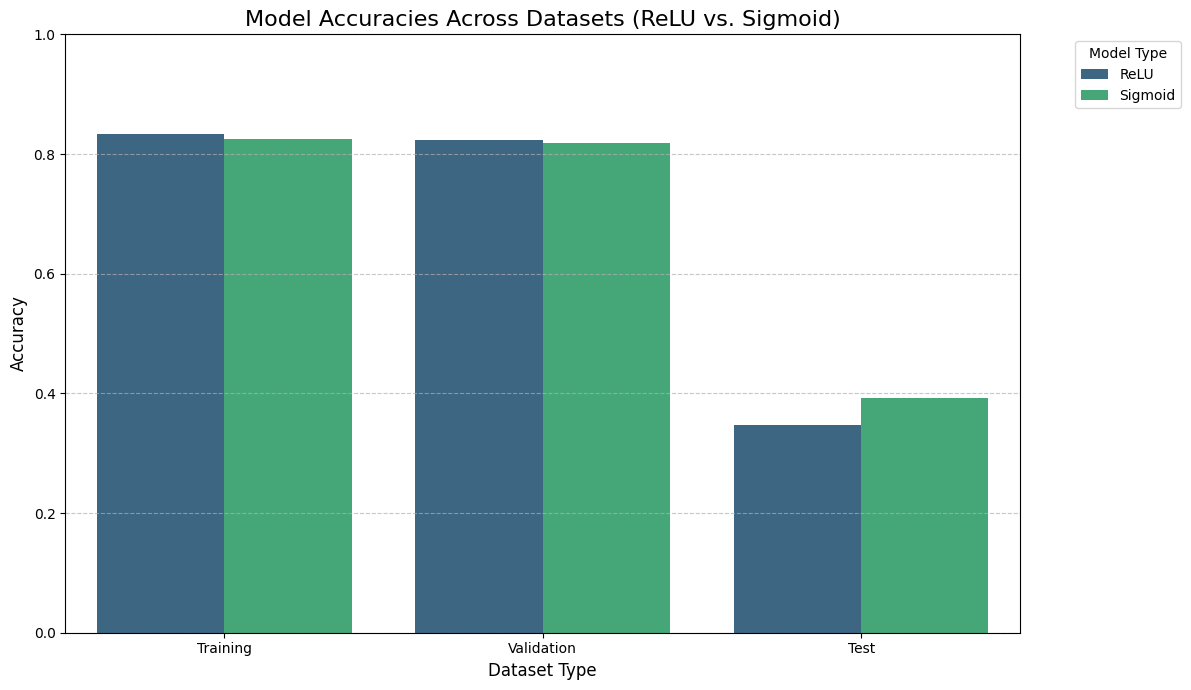

In [50]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Dataset', y='Accuracy', hue='Model', data=df_accuracies, palette='viridis')
plt.title('Model Accuracies Across Datasets (ReLU vs. Sigmoid)', fontsize=16)
plt.xlabel('Dataset Type', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1) # Accuracy ranges from 0 to 1
plt.legend(title='Model Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Insights from EDA (Part A):
**Class Imbalance:** Our initial EDA clearly showed a significant class imbalance in the price_class target variable, with 56.3% of the data belonging to price_class = 1. This strong imbalance means that a model could achieve a baseline accuracy of 56.3% by simply predicting the majority class for all samples.


**Feature Distributions:** While we visualized individual feature distributions, we did not explicitly compare them between the training/validation split and the test set. However, any differences in these distributions would directly impact generalization.


# Insights from Gradient-based Feature Attribution (Part C):
**Key Influential Features:** The gradient attribution identified amenity_score as overwhelmingly the most important feature (100% relative importance). Following that, neighbourhood_group_Manhattan, room_type_Shared room, neighbourhood_group_Brooklyn, and neighbourhood_group_Queens were also highly influential.


**Model's Learned Sensitivity:** The model learned to be highly sensitive to these top features. Its predictions are heavily driven by the values of amenity_score and the specific categorical representations of neighbourhood_group and room_type.


# **Root Cause of Generalization Failure:**
Combining these observations, the most probable root cause of the generalization failure is a significant data distribution shift between the training/validation data and the independent test data, potentially caused by the class imbalance.

# Difference of performance in training and testing

The models successfully learned to predict the target classes within the context of the training data's distribution. However, this learned knowledge did not transfer well to the test.csv data because the test.csv dataset presents a fundamentally different challenge or context that the models were not prepared for. The high influence of features like amenity_score in the training regime became a liability when that feature's predictive signal changed in the test data.


# Strategy

**Perform Comparative Data Analysis:**

Conduct a detailed Exploratory Data Analysis (EDA) comparing the distributions, ranges, and statistical properties of all features and the target variable between the train.csv (training/validation) and test.csv datasets. This step is crucial to explicitly identify where the data distribution shift is occurring.

**Implement Targeted Data Preprocessing or Augmentation:**

Based on the comparative EDA, implement targeted preprocessing adjustments or data augmentation techniques. For example, if certain feature ranges differ significantly, consider robust scaling or clipping. If the test set introduces new categories or different proportions, address this in one-hot encoding or use data augmentation to generate synthetic samples that bridge the distribution gap.